In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 12})
plt.rcParams["figure.figsize"] = (6,4)

In [3]:
excel_file=pd.ExcelFile('hyrdodata.xlsx')
df=pd.read_excel(excel_file, sheet_name="figure 2_unit_hydrograph")

In [5]:
L = 10
phi = 0.4
C = 1.2183396582162898
D = 1.1709401241247828

In [7]:
t = df["Time"][:373]
avgstart = df["peakAvg_start"][:373]

Text(0.5, 1.0, 'Flux over time')

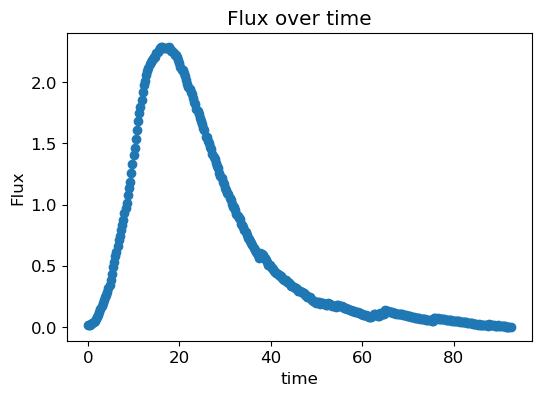

In [9]:
plt.scatter(t,avgstart)
plt.xlabel('time')
plt.ylabel('Flux')
plt.title('Flux over time')

In [ ]:
def Flux(t,fluxdata,H,K):
    U = (K*H)/(L)
    tau = phi*L**2/(H*K)
    t1,t2 = split_t(t,fluxdata)
    #A = +(np.sqrt(D**2*tau/(C**2*t1[-1]))-t1[-1]/tau)
    # Ensure that the argument inside the square root is non-negative
    sqrt_argument = D**2 * tau / (C**2 * t1[-1])  # The argument for the square root
    if sqrt_argument < 0:
        A = np.nan  # or some other default value, depending on your use case
    else:
        A = np.sqrt(sqrt_argument) - t1[-1] / tau
    Qrain = -(C**2*U*H*t1)/(2*tau)
    Qdrought = -(D**2*U*H)/(2*(t2/tau+A)**2)
    return np.abs(Qdrought),np.abs(Qrain),t1,t2